<a href="https://colab.research.google.com/github/Banderson0089/SQL-Portfolio/blob/main/ClimbingTicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tick List Analysis

### This is a training python notebook based on my personal Tick list of rock climbs I have completed.

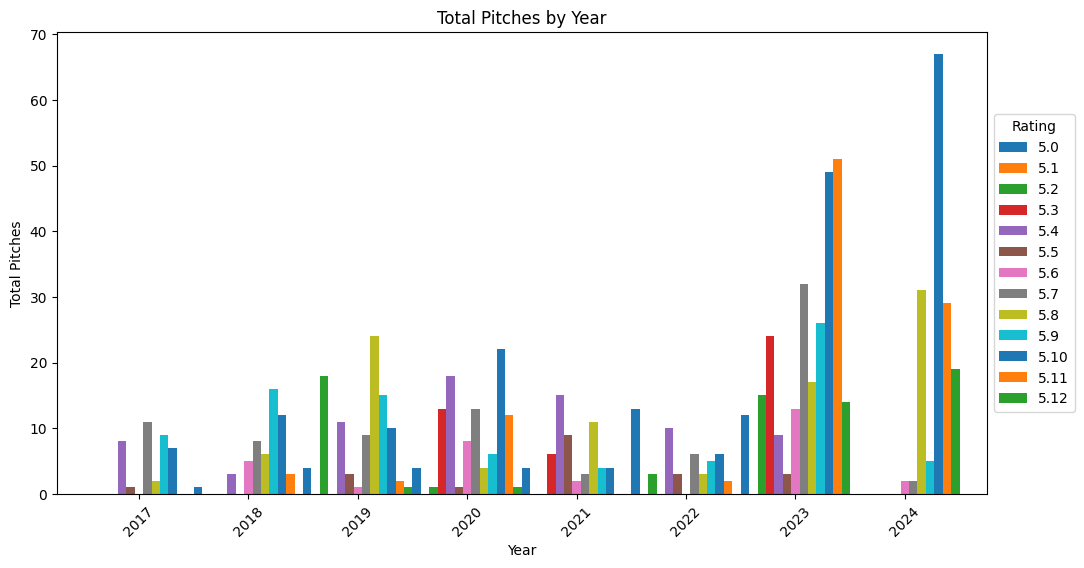

In [85]:
#This is a training python notebook based on my personal Tick list of rock climbs I have completed.
import matplotlib.pyplot as plt
import pandas as pd

filename = '/content/drive/MyDrive/Colab Notebooks/ClimbingTicks.ipynb'
# ... (Your existing code to load data into 'data_array')

# Convert the recarray to a pandas DataFrame
df = pd.DataFrame(data_array)

def normalize_rating(rating):
  """
  Normalizes a rating by removing the "+" or "-" symbol.

  Args:
    rating: The rating string.

  Returns:
    The normalized rating string.
  """
  return re.sub(r'\+|-', '', rating)

# Limit Rating to first 4 digits and filter for ratings starting with "5."
df['Rating'] = df['Rating'].str[:4]  # Limit to first 3 digits
df = df[df['Rating'].str.startswith('5.')]  # Filter for ratings starting with "5."
# Define the desired order of ratings
rating_order = ['5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '5.10', '5.11', '5.12']

# Convert the Rating column to categorical data with the specified order
df['Rating'] = pd.Categorical(df['Rating'], categories=rating_order, ordered=True)

# Extract the year from the Date column
df['Year'] = df['Date'].str.split('-').str[0]

# Group the data by year and rating, and sum the number of pitches
grouped_data = df.groupby(['Year', 'Rating'])['Pitches'].sum().unstack().fillna(0)

# Generate the plot
grouped_data.plot(kind='bar', figsize=(12, 6), width=1.0)
plt.title('Total Pitches by Year')
plt.xlabel('Year')
plt.ylabel('Total Pitches')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.legend(title='Rating', loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust bbox_to_anchor as needed
plt.show()

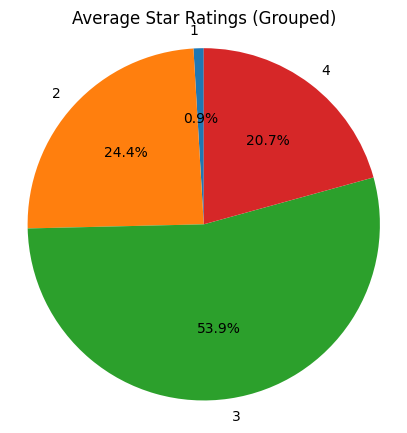

In [83]:
import matplotlib.pyplot as plt

def categorize_stars(stars):
  """
  Categorizes the average star ratings into groups of 1, 2, 3, 4, and 5.

  Args:
    stars: The average star rating.

  Returns:
    The corresponding category (1, 2, 3, 4, or 5).
  """
  # Convert stars to float before comparison
  stars = float(stars)  # Convert to float for numerical comparison
  if stars <= 1.0:
    return 1
  elif stars <= 2.0:
    return 2
  elif stars <= 3.0:
    return 3
  elif stars <= 4.0:
    return 4
  else:
    return 5

# Apply the function to the "Avg Stars" column and create a new column
df['Star Category'] = df['Avg Stars'].apply(categorize_stars)

# Group the data by "Star Category" and count the number of entries
star_category_counts = df.groupby('Star Category').size()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(star_category_counts, labels=star_category_counts.index, autopct="%1.1f%%", startangle=90)
plt.title('Average Star Ratings (Grouped)')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()